<a href="https://colab.research.google.com/github/rocklouis055/Colab/blob/main/Object_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras      #Importing the libraries.
from tensorflow import keras as tk
from keras.utils import np_utils as nu
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.python.ops.variables import trainable_variables as trv
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [ ]:
(X_train, Y_train), (X_test, Y_test) = tk.datasets.cifar10.load_data() #Spliting the dataset.

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Number of Training Images are : {}'.format(X_train.shape))  #Printing Image Information.
print('Number of Testing Images are : {}'.format(X_test.shape))

Number of Training Images are : (50000, 32, 32, 3)
Number of Testing Images are : (10000, 32, 32, 3)


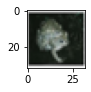

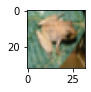

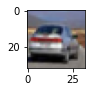

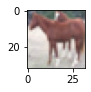

In [ ]:
for i in range(234,238):   #Viewing the Images.
  plt.subplot(120+ 1 + i)
  img=X_train[i]
  plt.imshow(img)
  plt.show()

In [ ]:
X_train=X_train.reshape(X_train.shape[0],32,32,3)   #Reshaping the Images.
X_test=X_test.reshape(X_test.shape[0],32,32,3)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train /=255
X_test /=255
n_classes =10
print("shape before one-hot encoding:",Y_train.shape)
Y_train=nu.to_categorical(Y_train, n_classes)
Y_test=nu.to_categorical(Y_test, n_classes)
print("shape after one-hot encoding:",Y_train.shape)

shape before one-hot encoding: (50000, 1)
shape after one-hot encoding: (50000, 10)


In [ ]:
model = Sequential()   #Building the model

#Adding convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(75, kernel_size=(3, 3), strides=(1,1), padding='same', activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout (0.25))
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

#Adding hidden Layer
model.add (Dense(500, activation='relu')) 
model.add (Dropout (0.4))
model.add (Dense(250, activation='relu'))
model.add(Dropout(0.3))

#Adding output Layer
model.add(Dense(10, activation='softmax'))

#Compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#Training the model 
model.fit(X_train, Y_train, batch_size=128, epochs=50, validation_data=(X_test,Y_test))

Epoch 1/50
391/391 [==============================] - 30s 47ms/step - loss: 1.5837 - accuracy: 0.4184 - val_loss: 1.2048 - val_accuracy: 0.5763
Epoch 2/50
391/391 [==============================] - 18s 45ms/step - loss: 1.1056 - accuracy: 0.6078 - val_loss: 0.9676 - val_accuracy: 0.6661
Epoch 3/50
391/391 [==============================] - 17s 45ms/step - loss: 0.9250 - accuracy: 0.6749 - val_loss: 0.8250 - val_accuracy: 0.7102
Epoch 4/50
391/391 [==============================] - 17s 44ms/step - loss: 0.8043 - accuracy: 0.7194 - val_loss: 0.7689 - val_accuracy: 0.7365
Epoch 5/50
391/391 [==============================] - 17s 44ms/step - loss: 0.7245 - accuracy: 0.7464 - val_loss: 0.7305 - val_accuracy: 0.7489
Epoch 6/50
391/391 [==============================] - 17s 44ms/step - loss: 0.6622 - accuracy: 0.7683 - val_loss: 0.6705 - val_accuracy: 0.7682
Epoch 7/50
391/391 [==============================] - 17s 44ms/step - loss: 0.5999 - accuracy: 0.7903 - val_loss: 0.6771 - val_accuracy:

In [ ]:
classes=range(0,10)     #Naming the classes.
names= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
clabels= dict(zip(classes,names))
batch=X_test[100:109]
labels=np.argmax(Y_test[100:109],axis=-1)
predictions=model.predict(batch, verbose=1)

1/1 [==============================] - 0s 195ms/step


In [ ]:
for image in predictions:  #Sum of accuracy.
  print(np.sum(image))

0.9999999
1.0
1.0
1.0
0.99999994
0.9999999
0.9999999
1.0
1.0


In [ ]:
cresult=np.argmax(predictions,axis=-1)   #Setting the table
print(cresult)

[4 5 6 3 1 1 3 6 8]


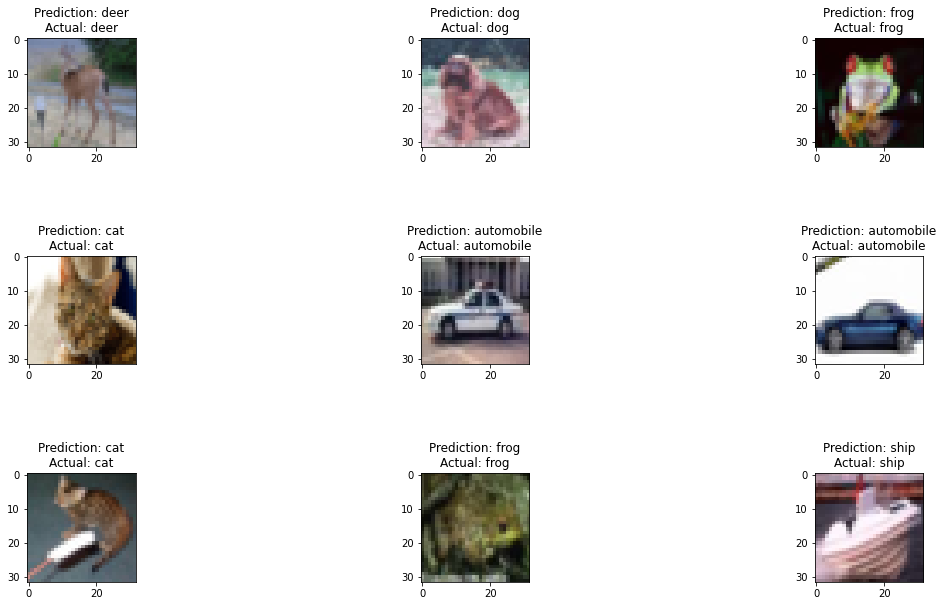

In [ ]:
fig, axs=plt.subplots(3, 3, figsize=(20,10))   #Testing the model generated.
fig.subplots_adjust(hspace=1)
axs=axs.flatten()


for i, img in enumerate(batch):
  for key, value in clabels.items():
    if cresult[i] == key: 
      title='Prediction: {}\nActual: {}'.format(clabels[key], clabels[labels [i]]) 
      axs[i].set_title(title)
  #Plottiing the image 
  axs[i].imshow(img)

#Show the plot
plt.show()